Inertia for K=2: 20.725689386948318


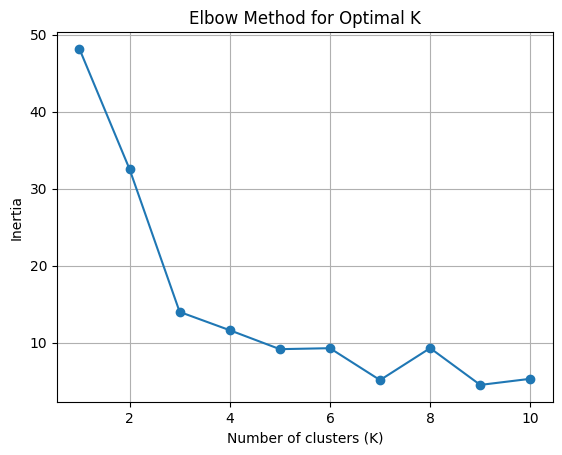

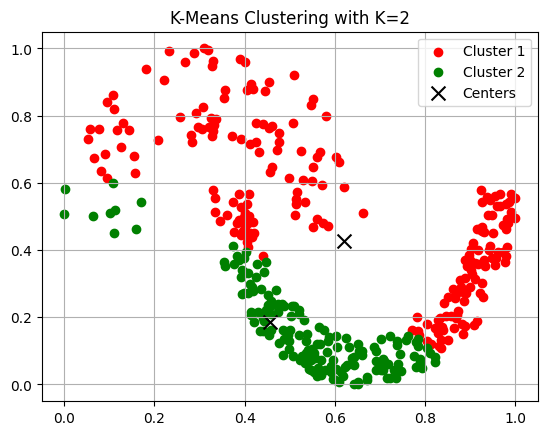

In [7]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np  

# Set seed
random.seed(11221447)  

# Function to load data from text file
def load_data_from_file(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            point = list(map(float, line.strip().split()))
            data.append(point)
    return data

# Euclidean distance function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to initialize centers randomly
def initialize_centers(data, k):
    return random.sample(data, k)

# Function to assign points to the nearest center
def assign_clusters(data, centers):
    clusters = [[] for _ in range(len(centers))]
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        min_index = distances.index(min(distances))
        clusters[min_index].append(point)
    return clusters

# Function to recalculate the center of each cluster
def calculate_new_centers(clusters):
    new_centers = []
    for cluster in clusters:
        if cluster:
            x_coords = [point[0] for point in cluster]
            y_coords = [point[1] for point in cluster]
            new_centers.append([sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords)])
        else:
            new_centers.append([0, 0])  # Handle empty cluster case
    return new_centers

# Function to calculate the inertia (sum of squared distances from cluster center)
def calculate_inertia(clusters, centers):
    inertia = 0
    for i, cluster in enumerate(clusters):
        center = centers[i]
        inertia += sum(euclidean_distance(point, center) ** 2 for point in cluster)
    return inertia

# K-means algorithm as per given instructions
def kmeans(data, k, max_iterations=100):

    centers = initialize_centers(data, k)
    clusters = [[] for _ in range(k)]
    
    itr = 1
    shift = 0
    
    while True:
      
        clusters = assign_clusters(data, centers)
        
       
        new_centers = calculate_new_centers(clusters)
        
        
        if itr > 1 and shift < 50:
            break
        
        
        shift = 0
        
        
        temp_clusters = assign_clusters(data, new_centers)
        
        
        for i, cluster in enumerate(clusters):
            if cluster != temp_clusters[i]:
                shift += 1
        
        
        clusters = temp_clusters
        centers = new_centers
        itr += 1
    
    # Calculate inertia at the end
    inertia = calculate_inertia(clusters, centers)
    
    return clusters, centers, inertia

# Plot elbow graph
def plot_elbow_graph(data, max_k=10):
    inertias = []
    k_values = list(range(1, max_k+1))
    for k in k_values:
        _, _, inertia = kmeans(data, k)
        inertias.append(inertia)
    
    plt.plot(k_values, inertias, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.grid(True)
    plt.show()

# Function to plot the clusters and centers
def plot_clusters(clusters, centers, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
   
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')
   
    # Plotting the centers
    centers = np.array(centers)
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100, label='Centers')
   
    plt.title(f"K-Means Clustering with K={k}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to run K-means and plot the elbow graph
def main():
    filename = 'input.txt'  # Replace with your input file name
    data = load_data_from_file(filename)
    
    # Run K-means for K=2
    k = 2
    clusters, centers, inertia = kmeans(data, k)
    print(f"Inertia for K={k}: {inertia}")
    
    # Plot the elbow graph
    plot_elbow_graph(data)

    clusters, centers, inertia = kmeans(data, k)
    plot_clusters(clusters, centers, k)

# Call the main function
main()
